In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

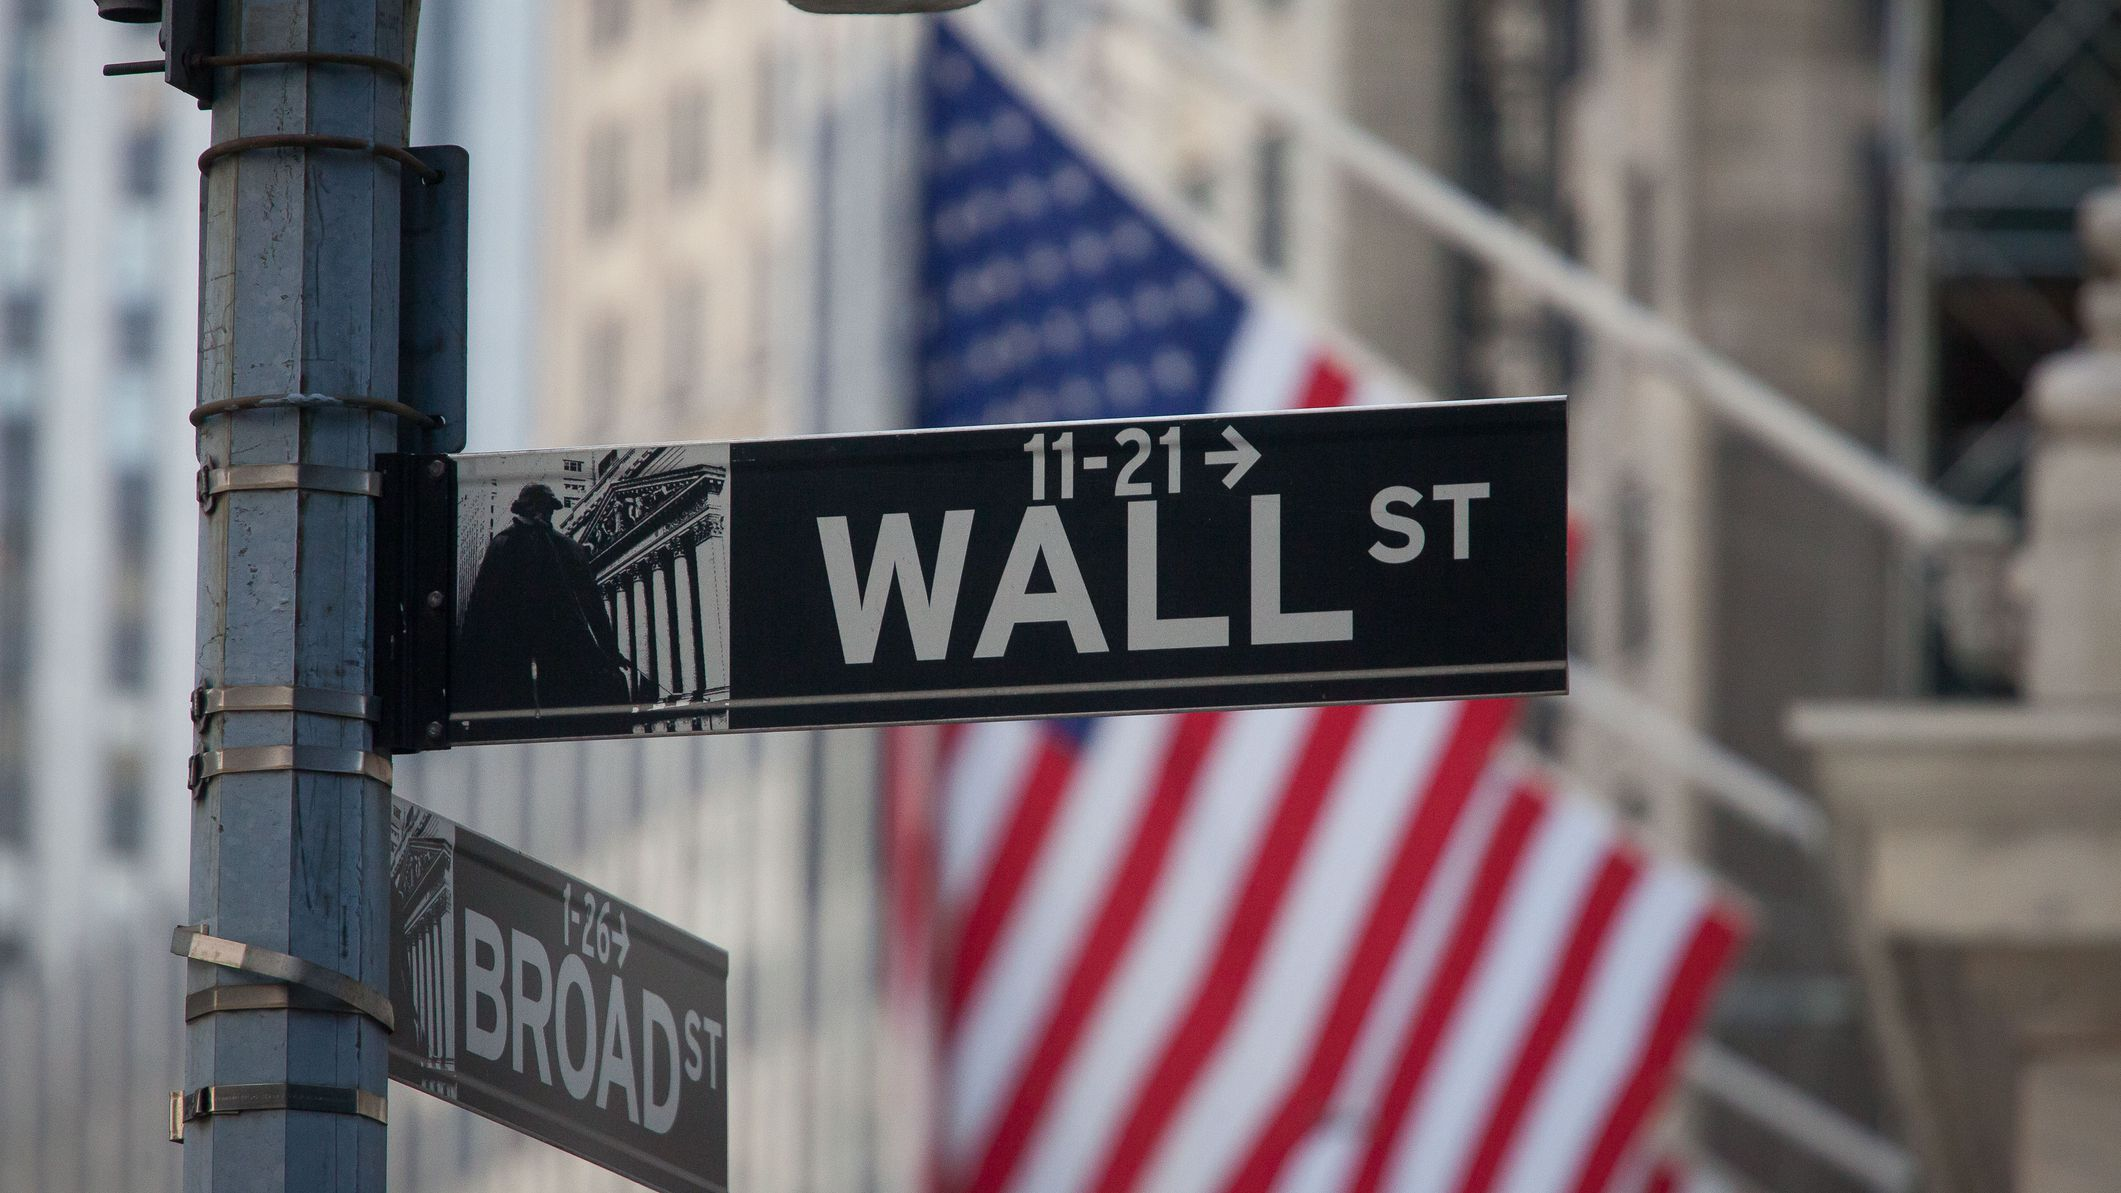

# Mcirosoft share price analysis

* I used this code https://github.com/CNuge/kaggle-code/blob/master/stock_data/getSandP.py to update the MSFT share price details

In [ ]:
import pandas as pd
#pick microsoft share price 
# load the data
data_MS = pd.read_csv('../input/microsoft-share-price/MSFT_data.csv')
data_MS.head()


In [ ]:
data_MS.isnull().sum() #check if we have zero values 

In [ ]:
data_MS.dtypes #check the types of data

# Pandas Profiling Report

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(data_MS)   

In [ ]:
data_MS['Date'] = pd.to_datetime(data_MS['Date'], format = "%Y/%m/%d") #convert argument to datetime
data_MS

In [ ]:
data_MS.drop('Name',1,inplace =True)

# Annual Return Calculation

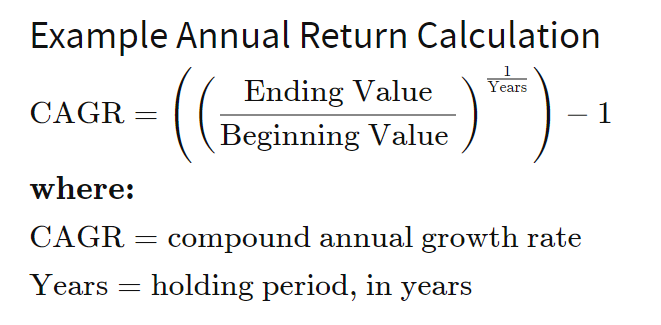

Source: https://www.investopedia.com/terms/a/annual-return.asp

In [ ]:
#### print(data_MS.loc[data_MS['Date'] =='2016-06-13']) # find index 0
#print(data_MS.loc[data_MS['Date'] =='2017-06-13']) # find index 252 
#504 #755 # 1008
#print(data_MS.loc[data_MS['Date'] =='2020-06-12']) # 1008

#specify rows and columns by their integer index
close1 = data_MS.iloc[252]['Close'] #take the first closing price 2016/06/13
#print(close1)
close2 = data_MS.iloc[504]['Close']  #take the 2020 closing price at the same day and month 06/13
#print(close2)

Years = 1
CARG = (((close2/close1)**(1/Years))-1)*100
print(f'Annual Return for {Years} years:',CARG)

so if you bought on 2016/06/13 and held until 2020/06/13, you will have grown by 39.32%
\
This is based on the closing price

# Yearly Rate of Return 

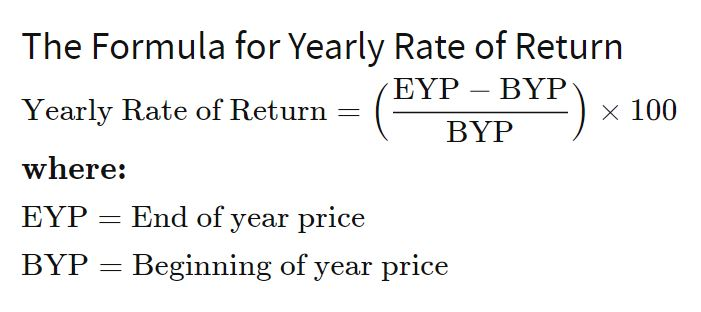

Source: https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
\
If you hold it for one year between 2016/06/13 and 2017/06/13 you will get 40.9% return, etc.
\
The numbers below and the plot show how your money will have grown if you held year by year. Dividend is excluded

In [ ]:
import matplotlib.pyplot as plt
#take closing price on 2016-06-13 and 2017-06-13 and subtract them to find annual return 
#The formula for percentage return begins by dividing the current price by the prior price (can be yearly daily or monthly).
#The number 1 is then subtracted from 
#this result before multiplying the resulting figure by 100 to convert it from decimal to percentage format.

close1 = data_MS.iloc[0]['Close']
close2 = data_MS.iloc[252]['Close']

#create a for loop to iterate
#ignore 2020 until 2021 returns for now, we havent reached 2021/06/13 yet to find the % return
list_percent_year =[]
for i in range(0,1260,252): #iterate by jumping over 252 values 2016 -> 2017 -> 2018 etc
    
    a = data_MS.iloc[i]['Close']   #pick the first closing value 
    if i == 1008: #when we reach 2020, stop working
        break
    b = data_MS.iloc[i+252]['Close'] #pick the next years closing value
    
    
    return1 = (((b-a)/a))*100
    list_percent_year.append(return1)
    print(return1)
#list_percent_year #these numbers are wierd

In [ ]:
#plot the yearly return 
data_MS['year'] = pd.DatetimeIndex(data_MS['Date']).year  #transform the year part of the datetime into an index
df_year = data_MS['year'].unique()

df_year = list(df_year)

print(df_year)
df_year.pop(0)
df_year.pop(-1)
df_year
plt.plot(df_year,list_percent_year)

### OHLC Chart

In [ ]:
#CREDIT: https://plotly.com/python/ohlc-charts/
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=data_MS['Date'],
                    open=data_MS['Open'],
                    high= data_MS['High'],
                    low=data_MS['Low'],
                    close=data_MS['Close']))
fig.show() 

# The 3 Moving averages

The adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day.

In [ ]:
import numpy as np
from scipy import stats # used for used mathematical and numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns   #used for statistical graphs


plt.figure(figsize=(15, 7))
plt.plot(data_MS['Date'],data_MS['Adj Close'],color='red')
plt.legend(['Adj. Close'])
plt.xlabel('Date')
plt.ylabel('Share price')

In [ ]:
#This is the SMA (Simple Moving Average)
#function provides the feature of rolling window calculations
#use the mean function to find the mean over each window
#rolling operation takes the cell and k values before it, where k in the windows parameter

#windows = 5 means 5 day moving average.
#min_periods will not allow NaN values but intsead will apply the mean rule on as many previous numbers as possible

#The bigger the windows value, the more it underfits
#The smaller the windows value, the more it overfits
data_MS['SMA'] = data_MS['Adj Close'].rolling(window=5, min_periods= 1).mean()
data_MS['SMA 50'] = data_MS['Adj Close'].rolling(window=50, min_periods= 1).mean()
data_MS

In [ ]:
from matplotlib.pyplot import figure


plt.figure(figsize=(15, 7))
plt.plot(data_MS['Date'][1148:1257],data_MS['Adj Close'][1148:1257],color='red',linewidth=3)
plt.plot(data_MS['Date'][1148:1257], data_MS['SMA'][1148:1257],linewidth=3)
plt.plot(data_MS['Date'][1148:1257], data_MS['SMA 50'][1148:1257],linewidth=3)

#Long term 50, 200 day windows value

plt.legend(['Adj. Close','SMA', 'SMA 50'])
plt.xlabel('Date')
plt.ylabel('Share price in $')


Often, the simple moving average is used to show a security’s price trend. If the simple moving average is trending upwards, for example, this indicates its price is rising. The opposite is true if a security’s price trend is declining. 

In [ ]:
data_MS['SMA 50'] = data_MS['Adj Close'].rolling(window=50, min_periods= 1).mean()
data_MS['SMA 200'] = data_MS['Adj Close'].rolling(window=200, min_periods= 1).mean()

plt.figure(figsize=(15, 7))

plt.plot(data_MS['Date'][1008:1257],data_MS['Adj Close'][1008:1257],color='red',linewidth=3)
plt.plot(data_MS['Date'][1008:1257], data_MS['SMA'][1008:1257],linewidth=3)
plt.plot(data_MS['Date'][1008:1257], data_MS['SMA 200'][1008:1257],linewidth=3)

plt.legend(['Adj. Close','SMA','SMA 200'])
plt.xlabel('Date')
plt.ylabel('Share price in $')

### Insight
THe SMA has an upwards trend so the share price is bound to increase. 
### Popular Trading Patterns
Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA.

### EMA 
What is the difference between a simple moving average and an exponential moving average?
While a simple moving average gives an equal weight to each of the values within a time period, an exponential moving average places greater weight on recent prices. Exponential moving averages are typically seen as a more timely indicator of a price trend. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ewm.html

In [ ]:
data_MS['EMA_0.1'] = data_MS['Adj Close'].ewm(alpha = 0.1,adjust=False).mean()
data_MS['EMA_0.3'] = data_MS['Adj Close'].ewm(alpha = 0.3,adjust=False).mean()
#data_MS = data_MS.drop(columns=['EMA','CMA'])
#The closer alpha is to 1, the more it overfits, it responds to changes more quickly
#The smaller alpha is, the higer degree of smoothing
data_MS

In [ ]:
plt.figure(figsize=(15, 7))

plt.plot(data_MS['Date'][1148:1257],data_MS['Adj Close'][1148:1257],color='red',linewidth = 3)
plt.plot(data_MS['Date'][1148:1257], data_MS['EMA_0.1'][1148:1257], linewidth = 2)
plt.plot(data_MS['Date'][1148:1257],data_MS['EMA_0.3'][1148:1257],color = 'green',linewidth = 2)

plt.legend(['Adj. Close','Alpha =  0.1', 'Alpha = 0.3'])
plt.xlabel('Date')
plt.ylabel('Share price')

In [ ]:
plt.figure(figsize=(15, 7))

plt.plot(data_MS['Date'],data_MS['Adj Close'],color='red')
plt.plot(data_MS['Date'], data_MS['EMA_0.1'])
plt.legend(['Adj. Close','EMA'])
plt.xlabel('Date')
plt.ylabel('Share price')

In [ ]:
plt.figure(figsize=(15, 7))


plt.plot(data_MS['Date'][1148:1257],data_MS['Adj Close'][1148:1257],color='red',linewidth = 3)
plt.plot(data_MS['Date'][1148:1257], data_MS['EMA_0.1'][1148:1257], linewidth = 3)
plt.plot(data_MS['Date'][1148:1257], data_MS['SMA 50'][1148:1257],linewidth=3)

plt.legend(['Adj. Close','Alpha =  0.1', 'SMA 50 day'])
plt.xlabel('Date')
plt.ylabel('Share price')

### Insight
When the market is in a strong and sustained uptrend, the EMA indicator line will also show an uptrend and vice-versa for a downtrend. When the EMA crosses the SMA downwards, it goes into a downwards trend. But if EMA crosses SMA upwards, it is a upwards/ buy trend.

# Trading Volume

In [ ]:
# Try to make an exponential moving average over that first volume plot
import matplotlib.pyplot as plt
import numpy as np
#data_MS['EMA_Volume'] = data_MS['Volume'].ewm(span=40,adjust=False).mean()
data_MS['VMA'] = data_MS['Volume'].rolling(window=50, min_periods= 1).mean()
data_MS

In [ ]:

plt.figure(figsize=(15, 7))
plt.plot(data_MS['Date'],data_MS['Volume'],linewidth = 3)
plt.plot(data_MS['Date'],data_MS['VMA'],color='red',linewidth = 2)
plt.xlabel('Dates')
plt.ylabel('Volume traded')
plt.tight_layout()

In [ ]:
#sns.displot(data=data_MS, x="Volume", col="year", kde=True)
#which histogram has the highest mean?
data_MS['VMA'] = data_MS['Volume'].rolling(window=5, min_periods= 1).mean()
plt.figure(figsize=(13, 6))
plt.plot(data_MS['Date'][1148:1257],data_MS['Volume'][1148:1257],linewidth = 3)
plt.plot(data_MS['Date'][1148:1257],data_MS['VMA'][1148:1257],color='orange',linewidth = 2)

plt.figure(figsize=(13, 6))


plt.plot(data_MS['Date'][1148:1257],data_MS['Adj Close'][1148:1257],color='red',linewidth = 3)
plt.plot(data_MS['Date'][1148:1257], data_MS['EMA_0.1'][1148:1257], linewidth = 3)
plt.plot(data_MS['Date'][1148:1257], data_MS['SMA 50'][1148:1257],linewidth=3)

plt.legend(['Adj. Close','Alpha =  0.1', 'SMA 50 day'])
plt.xlabel('Date')
plt.ylabel('Share price')

### Insight
>Trading volume can help an investor identify momentum in a security and confirm a trend. If trading volume increases, prices generally move in the same direction. That is, if a security is continuing higher in an uptrend, the volume of the security should also increase and vice versa.

ref:https://www.investopedia.com/ask/answers/041015/why-trading-volume-important-investors.asp

In [ ]:
#find the index of only 2016 #that a half year only though
data_MS['Date'].index[data_MS['Date']== '2021-01-04']
#141:391 for 2017
#392:642 for 2018
#643:894 for 2019
#895:1147 for 2020
#no plot them

In [ ]:

fig, (ax1, ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,15))
ax1.plot(data_MS['Date'][141:391],data_MS['Volume'][141:391])
ax1.plot(data_MS['Date'][141:391],data_MS['EMA_Volume'][141:391],color='red')

ax2.plot(data_MS['Date'][392:642],data_MS['Volume'][392:642])
ax2.plot(data_MS['Date'][392:642],data_MS['EMA_Volume'][392:642],color='red')

ax3.plot(data_MS['Date'][643:894],data_MS['Volume'][643:894])
ax3.plot(data_MS['Date'][643:894],data_MS['EMA_Volume'][643:894],color='red')


ax4.plot(data_MS['Date'][895:1147],data_MS['Volume'][895:1147])
ax4.plot(data_MS['Date'][895:1147],data_MS['EMA_Volume'][895:1147],color='red')

#plt.plot(data_MS['Date'][1148:1257],data_MS['EMA_Volume'][1148:1257],color='red')
a =data_MS['Volume'][141:391]
b = data_MS['Volume'][392:642]
c = data_MS['Volume'][643:894]
d = data_MS['Volume'][895:1147]
#print(np.mean(a))
fig.tight_layout()
print('Mean Volume values')
print(f'For 2017: {np.mean(a)}')
print(f'For 2018: {np.mean(b)}')
print(f'For 2019: {np.mean(c)}')
print(f'For 2020: {np.mean(d)}') # 2020 has the highest volume traded during March April and May
#What is the reason for that? People were selling due to COVID

In [ ]:

#What day had the highest volumes traded
data_MS.iloc[data_MS['Volume'].argmax()]

Maybe becasue MSFT overpayed for Linkdin, This article could explain why that date had highest volume: https://www.fool.com/investing/2016/06/29/why-microsoft-stock-is-down-13-in-2016.aspx

# Additional research

In [ ]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
import plotly.graph_objects as go
data_MS_New = data_MS.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(data_MS_New)))
fig.show()

In [ ]:
# Now look at the things that have a positive correlation and plot them
#Plot for example the high with the low to see their relation
import plotly.express as px
fig = px.scatter(data_MS, x= 'High',y = 'Low')
fig.update_layout(title_text = 'High vs Low')
fig.show()
#CONCLUSION: the high and low are lineraly dependent
#makes sense since the higher a price of a stock goes, it can reach a new and bigger low every day. 

# Volatility Index

>While variance captures the dispersion of returns \
around the mean of an asset in general, volatility is a\
measure of that variance bounded by a specific period of \
time. Thus, we can report daily volatility, weekly, monthly,\
or annualized volatility. It is, therefore, useful to think of\
volatility as the annualized standard deviation.

Article Followed: https://www.investopedia.com/terms/v/volatility.asp

In [ ]:
mean_close = data_MS['Close'].mean()

deviation = []
for i in data_MS['Close']:
    value = i - mean_close
    deviation.append(value)
deviation = np.array(deviation)


deviation_squared = deviation**2

deviation_squared_sum = sum(deviation_squared)
#deviation_squared_mean = np.mean(deviation_squared)
print(deviation_squared_sum)


variance = deviation_squared_sum / len(data_MS)

print(variance)

std = np.sqrt(variance)
std
#This is a measure of risk and shows how values 
#are spread out around the average price. 
#It gives traders an idea of how far the price may deviate from the average.

In this case, the resulting variance is 3476.70. The square root is taken to get the standard deviation.
\
This equals 58.9. This is a measure of risk and shows how values are 
\
spread out around the average price. It gives traders an idea of how far 
\
the price may deviate from the average. 

In [ ]:
#percent change, I took it from this video: https://www.youtube.com/watch?v=d2kXmWzfS0w&ab_channel=DerrickSherrill
close_data = data_MS['Close']
percent_change = close_data.pct_change()
print(percent_change)


In [ ]:
#Try and plot volatility, using this article: https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
#But apparently it is the same numbers as above for the percenage change 
#so percent change up is the same as log_ret here
#.shift will shift the value of the index by 1 in this case 
#print(data_MS['Close'].shift(1))
#print(data_MS['Close'] / data_MS['Close'].shift(1))

data_MS['Log_Ret'] = np.log(data_MS['Close'] / data_MS['Close'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
data_MS['Volatility'] = data_MS['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
data_MS.head()

In [ ]:
#Just the Volatility index plot
plt.plot(data_MS['Date'],data_MS['Volatility'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volatility index')
#figure.tight_layout()

In [ ]:
#Compare the two plots
figure, ax = plt.subplots(2)

ax[0].plot(data_MS['Date'],data_MS['Close'],color='red',label = 'Close')
ax[0].set(ylabel = 'Close price')
ax[0].legend()
ax[1].plot(data_MS['Date'],data_MS['Volatility'],color='orange',label = 'Volatility')
ax[1].legend()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volatility index')

fig = plt.gcf()
fig.set_size_inches(15.5, 8)

# Video Help

Any code used will be thanks to this video: https://www.youtube.com/watch?v=57qAxRV577c&ab_channel=ahmadbazzi

In [ ]:
data_MS.set_index('Date', inplace=True)
#plt.plot(data_MS['Date'],data_MS['Close'])
data_MS['Close'][1000:].plot(label = 'Close',figsize=[15,7])
data_MS['Open'][1000:].plot(label = 'Open')
data_MS['High'][1000:].plot(label = 'High')
data_MS['Low'][1000:].plot(label = 'Low')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Share price')

In [ ]:
#data_MS = data_MS.set_index('Date')
data_MS['Volume'][1000:].plot()
plt.xticks(rotation=45)

# Google vs Microsoft vs Apple

In [ ]:
import pandas as pd #imoort all the data
ms = pd.read_csv('../input/microsoft-share-price/MSFT_data.csv')
google = pd.read_csv('../input/google-data/GOOGL_data.csv')
apple = pd.read_csv('../input/AAPL-data/AAPL_data.csv')

In [ ]:
apple = apple.set_index('Date')
ms = ms.set_index('Date')
google = google.set_index('Date')

In [ ]:
import matplotlib.pyplot as plt 
ms['Open'].plot(label = 'MSFT',figsize=(15,7))
apple['Open'].plot(label = 'AAPL')
google['Open'].plot(label = 'GOOGL')
plt.xticks(rotation= 45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Share price in $')

In [ ]:
google['Volume'].plot(label = 'GOOGL',figsize=(15,7))
apple['Volume'].plot(label = 'AAPL')
ms['Volume'].plot(label = 'MSFT')
plt.legend()

In [ ]:

#What is the highest volume number in the apple data?
apple.iloc[apple['Volume'].argmax()]

This article explains the sharp rise in volume: https://9to5mac.com/2017/02/01/aapl-stock-opens-up-5-after-company-reports-record-revenue-beats-analyst-expectations/

In [ ]:
#This high jump explains the volume
apple['Open'][100:200].plot()
plt.xticks(rotation=45)

In [ ]:
#Market cap = Open price * Volume, not a true representation
apple['Total traded'] = apple['Open'] * apple['Volume']
google['Total traded'] = google['Open'] * google['Volume']
ms['Total traded'] = ms['Open'] * ms['Volume']

In [ ]:
google['Total traded'].plot(label = 'GOOGL',figsize=(15,7))
apple['Total traded'].plot(label = 'AAPL')
ms['Total traded'].plot(label = 'MSFT')
plt.legend()

In [ ]:
#What is the highest total traded, 2 trillion dollars market cap is reached
apple.iloc[apple['Total traded'].argmax()]

This article could explain that big movement: https://www.macrumors.com/2020/08/24/apple-stock-500/

In [ ]:
# Moving averages,
#in my previous attempt, SMA and CMA will not be suitable, but EMA seems very good,
#Here I will try the example from the video on apple

apple['Open'].plot(figsize=(15,7))
apple['MA50'] = apple['Open'].rolling(50).mean()
apple['MA200'] = apple['Open'].rolling(200).mean()

apple['MA50'].plot()
apple['MA200'].plot()


In [ ]:
# find correlation between these companies 

from pandas.plotting import scatter_matrix
#concatenate all the data on the columns side, axis = 1 and call it tech
tech = pd.concat([apple['Open'],ms['Open'],google['Open']],axis=1)
tech.columns = ['Apple Open', 'MSFT Open', 'Google Open']
tech.head()

In [ ]:
scatter_matrix(tech,figsize = (15,7),hist_kwds = {'bins':50})
#between all of them there is a positive correlation
#first enter the frame and change the histogram keyword to have 50 bins

### Insight

It seems all three shares are correlated

### Daily percentage change  
$$
r_t = \frac{p_t}{p_{t -1}} -1
$$
return at time t = (price at time t / price at time t-1 ) -1\
The value reported is percentage gain (or loss). The larger the ratio, the better the returns. \
Good to use it to analyze the volatility of the stock (wider distribution) 


In [ ]:
#daily percentage change

apple['return'] = (apple['Close']/ apple['Close'].shift(1))-1
ms['return'] = (ms['Close']/ ms['Close'].shift(1))-1
google['return'] = (google['Close']/ google['Close'].shift(1))-1

In [ ]:
#Plot the histogram of returns, alpha decides how transparent the image will be
#Volatility, the bigger the dispersion the more volatile the plot is 


ms['return'].hist(bins=100,label = 'MSFT',alpha= 0.5)
apple['return'].hist(bins=100,label = 'APPL',alpha= 0.5,figsize=(13,4))
google['return'].hist(bins=100,label = 'GOOGL',alpha= 0.5)
plt.legend()

### Insight
The higher the variance, the higher the standard deviation -> higer volatility.\
MSFT seems to be a bit more volatile compared to the rest

In [ ]:
apple['return'].plot(kind='kde',figsize=(13,6),label = 'APPL')
google['return'].plot(kind='kde',label = 'GOOGL')
ms['return'].plot(kind='kde',label = 'MSFT')
plt.legend() #Kernel Density Estimation plot

In [ ]:
#create a new data witht the
box = pd.concat([apple['return'],ms['return'],google['return']],axis=1)
box.columns = ['AAPL', 'MSFT', 'GOOGL']
box.plot(kind='box',figsize=(15,6))
box
#Boxplots tell different information. We can see the outliers, maximum and minimum vlaues,
#upper and lower quartile, median

In [ ]:
scatter_matrix(box,figsize = (10,8),hist_kwds = {'bins':50},alpha = 0.5)

### Cumulative return
>A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage, and it is the raw mathematical return of the following calculation:
$$
i_t = (1+r_t) i_{t-1} = (1 + \frac{p_t}{p_{t -1}}-1) i_{t-1} = \frac{p_t}{p_{t -1}}i_{t-1}
$$

We are accumulating the returns. Takes into account daily returns. Doesnt include divident

In [ ]:
#Cumulative return has 
apple['Cumulative return'] = (1+ apple['return']).cumprod() #cumulative product
ms['Cumulative return'] = (1+ ms['return']).cumprod()
google['Cumulative return'] = (1+ google['return']).cumprod()
google.head()

In [ ]:
apple['Cumulative return'].plot(figsize=(15,6),label = 'AAPL')
ms['Cumulative return'].plot(label = 'MSFT')
google['Cumulative return'].plot(label = 'GOOGL')
plt.title('Cumulative return vs time')
plt.legend()
#apple.tail() # 5.182248
#ms.tail() #5.130435
#google.tail() #3.327226

### Insight
All values for cumulative return begin with 1 \
but end with different values at the tail. \
So we can answer the question, which stock has the highest return for 1$?? \
Both AAPL and MSFT perform well, but AAPL is the winner (5.182248 vs 5.130435)

# Predict MSFT stock price

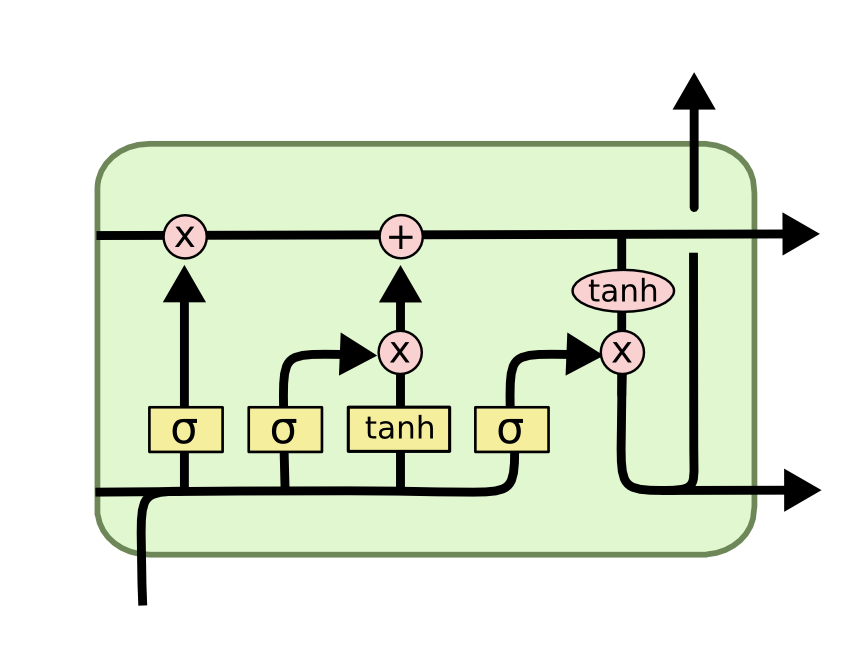(http://)

Vidoe withe valuable information: https://youtu.be/8HyCNIVRbSU

Reference followed: https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

In [ ]:
%matplotlib inline
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize']=20,10
from keras.models import Sequential  
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler 

#Sequential for initializing the neural network
#Dense for adding a densely connected neural network layer
#LSTM for adding the Long Short-Term Memory layer
#Dropout for adding dropout layers that prevent overfitting

In [ ]:
training_set = data_MS.iloc[:,3:4].values #Take the Open price column and all the values on it
training_set

In [ ]:
from sklearn.preprocessing import MinMaxScaler # first scale the training set
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled #This is the scaled training data

In [ ]:
len(training_set_scaled[0:60, 0])

In [ ]:
X_train = [] #Create data in 60 timesteps and convert it to an numpy array.
y_train = []
for i in range(60, 1258):    #1258 - 60 = 1198 #Go from 60 until 1258, excluding the last element
    #print(i)
    X_train.append(training_set_scaled[i-60:i]) #Take 60 elements [0:60], [1:61], [2:62] from the training scaled data 
    y_train.append(training_set_scaled[i])   #takes a single number, starting from the 60th index
    
#print(len(X_train))
#print(len(y_train))
X_train, y_train = np.array(X_train), np.array(y_train)

#print(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
#print(X_train[0])              #1198 rows          #60 elements    #1 column
#reshpae a into 1198 rows, each with 60 elements under 1 column

In [ ]:
#### a = np.arange(6).reshape((3, 2,))
print(a) 
a = np.reshape(a, (a.shape[0], a.shape[1], 1)) #reshpae a into 3 rows, each with 2 elements under 1 column
a                      #3          #2

More information about LSTM: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [ ]:
#The input is a 3D tensor with shape [batch, timesteps, feature].

regressor = Sequential()
#50 dimensionality of the output space.| 
#Whether to return the last output. in the output sequence, or the full sequence. 
#Shape of training set = (60,1)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #to prevent overfitting, drop 20% of the layers

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
import pandas as pd    #insert the test data         #Intesr the latest data of MSFT
dataset_test = pd.read_csv('../input/msft-data-from-1106-until-0207/MSFT (1).csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_test.tail()

In [ ]:
real_stock_price

In [ ]:
dataset_total = pd.concat((data_MS['Open'], dataset_test['Open']), axis = 0) #combine both datasets over the rows
#print(len(dataset_test))#1273                  #15  

#print(dataset_total[1198:]) just take that fraction and save it on inputs
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values   #1273 - 15 = 1258 - 60 = 1198:

#print(inputs)
inputs = inputs.reshape(-1,1) #a single line
#print(len(inputs))
inputs = sc.transform(inputs) #standarize the data with Min Max Scalar, seperately form the train set
#print(inputs)

X_test = []     

for i in range(60, 76): #the length of inputs is 75
    X_test.append(inputs[i-60:i, 0])  #[0:60], [1:61], [2:62], 
X_test = np.array(X_test)
print(X_test.shape[1]) #16




                                     #16                 60                           
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #same as before, same shape as X_train
#print(X_test)

predicted_stock_price = regressor.predict(X_test)
#print(predicted_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #get back the normal numbers 
print(len(predicted_stock_price))
print(len(dataset_test['Open']))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))

plt.plot(dataset_test['Date'],real_stock_price, color = 'black', label = 'MSFT Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT stock price')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
#predicted_stock_price.pop(-1)
predicted_stock_price= np.resize(predicted_stock_price, predicted_stock_price.size - 1)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(real_stock_price, predicted_stock_price))
print(mean_squared_error(real_stock_price, predicted_stock_price,squared = False))